# Napier's Logarithms: 九九のない世界

## R=5のときのNapierの対数を計算する

Naperはこの数列を技巧を凝らして計算したが、単純に計算すると膨大な計算量となるため、まず $R=5$ の場合を計算する。

$$
\begin{eqnarray}
p_{0}   &=& 10^5 = 100000 \\
p_{1}   &=& 10^5 \left(1-\frac{1}{10^5} \right)= 100000 \times 0.99999 = 99999 \\
p_{n+1} &=& p_{n} \left(1-\frac{1}{10^5}\right) = p_{n} \times 0.99999 
\end{eqnarray}
$$

底の変換によって、$R=7$ の場合を効率よく近似できるため、これらの計算は無駄にならない:

$$
  \log_{1-10^{-5}} \frac{N}{10^5} = \frac{\log_{1-10^{-7}}\frac{N}{10^5}}{\log_{1-10^{-7}}(1-10^{-5})} \approx \frac{1}{100}\log_{1-10^{-7}}\frac{N}{10^5} = \frac{1}{100} L(N \times 100)
$$

In [1]:
import math
import numpy as np

In [8]:
math.log(1-10**-5, 1-10**-7)

100.00049505548901

関数を繰り返し適用する (数列の値を次々に求める) Python関数を定義する:

In [5]:
def nest_list(f, x, c=1):
    while True:
        yield x
        x = f(x)
        if x < c:
            break
    yield x

In [6]:
10**5, 1-10**(-5)

(100000, 0.99999)

In [7]:
nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)

<generator object nest_list at 0x7c57150d7920>

In [8]:
n = nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)
for _ in range(10):
    print('{:5.0f}'.format(next(n)))

100000
99999
99998
99997
99996
99995
99994
99993
99992
99991


```{note}
$10000 \times 0.99999 \times 0.99999 \times \cdots$の値が$1$以下になるまで$0.99999$の乗算を繰り返してリストに格納する。リストの添字がNapierの対数になる
```

In [9]:
napier5=np.array(list(nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)))

In [10]:
napier5.size, napier5[-1]

(1151288, 0.9999979002909413)

In [11]:
napier5[0:100]

array([100000.        ,  99999.        ,  99998.00001   ,  99997.00003   ,
        99996.00006   ,  99995.0001    ,  99994.00015   ,  99993.00021   ,
        99992.00027999,  99991.00035999,  99990.00044999,  99989.00054998,
        99988.00065998,  99987.00077997,  99986.00090996,  99985.00104995,
        99984.00119994,  99983.00135993,  99982.00152992,  99981.0017099 ,
        99980.00189989,  99979.00209987,  99978.00230985,  99977.00252982,
        99976.0027598 ,  99975.00299977,  99974.00324974,  99973.00350971,
        99972.00377967,  99971.00405963,  99970.00434959,  99969.00464955,
        99968.0049595 ,  99967.00527945,  99966.0056094 ,  99965.00594935,
        99964.00629929,  99963.00665922,  99962.00702916,  99961.00740909,
        99960.00779901,  99959.00819893,  99958.00860885,  99957.00902877,
        99956.00945868,  99955.00989858,  99954.01034848,  99953.01080838,
        99952.01127827,  99951.01175816,  99950.01224804,  99949.01274792,
        99948.01325779,  

In [12]:
napier5[-100:]

array([1.00098839, 1.00097838, 1.00096837, 1.00095836, 1.00094835,
       1.00093834, 1.00092834, 1.00091833, 1.00090832, 1.00089831,
       1.0008883 , 1.00087829, 1.00086828, 1.00085827, 1.00084826,
       1.00083826, 1.00082825, 1.00081824, 1.00080823, 1.00079822,
       1.00078821, 1.00077821, 1.0007682 , 1.00075819, 1.00074818,
       1.00073818, 1.00072817, 1.00071816, 1.00070815, 1.00069815,
       1.00068814, 1.00067813, 1.00066813, 1.00065812, 1.00064811,
       1.00063811, 1.0006281 , 1.00061809, 1.00060809, 1.00059808,
       1.00058808, 1.00057807, 1.00056806, 1.00055806, 1.00054805,
       1.00053805, 1.00052804, 1.00051804, 1.00050803, 1.00049803,
       1.00048802, 1.00047802, 1.00046801, 1.00045801, 1.000448  ,
       1.000438  , 1.00042799, 1.00041799, 1.00040799, 1.00039798,
       1.00038798, 1.00037797, 1.00036797, 1.00035797, 1.00034796,
       1.00033796, 1.00032796, 1.00031795, 1.00030795, 1.00029795,
       1.00028794, 1.00027794, 1.00026794, 1.00025793, 1.00024

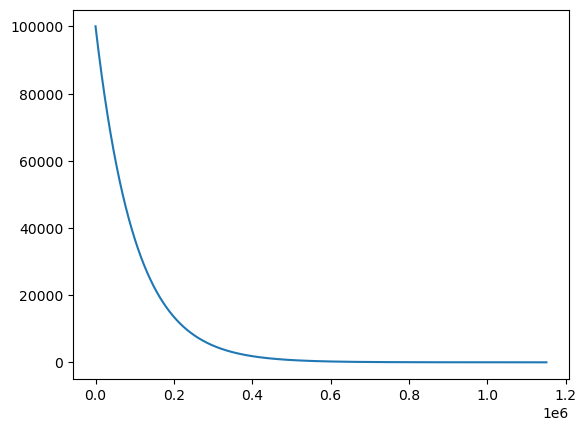

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(0,napier5.size,num=napier5.size)
plt.plot(x,napier5)

### 九九のない世界

上で求めた配列 ```napier5``` を検索し、対数を求める: $n = \log_{1-10^{-5}}(p_{n})$

In [14]:
napier5[0], napier5[-1]

(100000.0, 0.9999979002909413)

In [15]:
np.searchsorted?

Signature:       np.searchsorted(a, v, side='left', sorter=None)
Call signature:  np.searchsorted(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function searchsorted at 0x7c5731596700>
File:            /opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py
Docstring:      
Find indices where elements should be inserted to maintain order.

Find the indices into a sorted array `a` such that, if the
corresponding elements in `v` were inserted before the indices, the
order of `a` would be preserved.

Assuming that `a` is sorted:

======  ============================
`side`  returned index `i` satisfies
======  ============================
left    ``a[i-1] < v <= a[i]``
right   ``a[i-1] <= v < a[i]``
======  ============================

Parameters
----------
a : 1-D array_like
    Input array. If `sorter` is None, then it must be sorted in
    ascending order, otherwise `sorter` must be an array of indices
    that sort it.
v : array_like
    Value

```{note}
与えられた数の対数は、リストの数値の内でその数に最も近い値を取る数の添字
```

In [16]:
def n_log(x):
    if x < napier5[0] and x > napier5[-1]:
        return np.searchsorted(-napier5, -x)
    else:
        raise IndexError

In [28]:
n_log(1234), n_log(5678)

(439489, 286856)

In [29]:
napier5[439489], napier5[286856]

(1233.9966508401064, 5677.981745569941)

In [31]:
sum((439489, 286856))

726345

In [33]:
napier5[726345] * 10**5

7006610.457565

In [34]:
1234*5678

7006652

In [35]:
def n_times(x, y):
    return napier5[n_log(x)+n_log(y)] * 10**5

In [36]:
n_times(1234, 5678)

7006610.457565